In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# 6.4.1 Import linear regression from the SciPy stats module.
from scipy.stats import linregress

#import the datetime module from the datetime library.
from datetime import datetime


# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


617

In [6]:
# 6.2.6 Get the City Weather Data


# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
    # City, country, and date
    # Latitude and longitude
    # Maximum temperature
    # Humidity
    # Cloudiness
    # Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.


In [7]:
# 1. Import Dependencies, and Initialize an Empty List and Counters

# I placed dependencies in the first cell.  


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# 2. Loop through all the cities in our list.
for i, city in enumerate(cities):

    # 3. Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # 4. Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # 5. Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} : {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # 6. Run an API request for each of the cities.
    try:
        # 7. Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

    
# **reminder: % is modulus: Divides left hand operand by 
# right hand operand and returns remainder **


# **reminder: += is Add AND: It adds right operand to the 
# left operand and assign the result to left operand
# c += a is c = c + a **

# **Use the enumerate() method as an alternative way to iterate 
# through the list of cities and retrieve both the index, 
# and the city from the list.
# enumerate syntax is for i, item/index in enumerate(list):  **

# **city.replace(" ","+"): concatenates out blank spaces in url. ** 

# **Add a try-except block to the code to prevent the API request 
# from stopping prematurely if the city_weather request isn't a valid 
# response. If the request isn't valid, the code will not find the 
# first item requested, which is the dictionary "coord" with the code
# city_lat = city_weather["coord"]["lat"], and skip the city and 
# continue to run. **

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 : torbay
Processing Record 2 of Set 1 : ushuaia
Processing Record 3 of Set 1 : alushta
Processing Record 4 of Set 1 : pineville
Processing Record 5 of Set 1 : kahului
Processing Record 6 of Set 1 : port alfred
Processing Record 7 of Set 1 : dikson
Processing Record 8 of Set 1 : aklavik
Processing Record 9 of Set 1 : hervey bay
Processing Record 10 of Set 1 : hobart
Processing Record 11 of Set 1 : punta arenas
Processing Record 12 of Set 1 : hithadhoo
Processing Record 13 of Set 1 : busselton
Processing Record 14 of Set 1 : puerto ayora
Processing Record 15 of Set 1 : tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 : hanumangarh
Processing Record 17 of Set 1 : hilo
Processing Record 18 of Set 1 : atuona
Processing Record 19 of Set 1 : warqla
City not found. Skipping...
Processing Record 20 of Set 1 : bluff
Processing Record 21 of Set 1 : nikolskoye
Processing Record 22 of Set 1 : 

Processing Record 37 of Set 4 : cedar city
Processing Record 38 of Set 4 : sao filipe
Processing Record 39 of Set 4 : pitimbu
Processing Record 40 of Set 4 : auki
Processing Record 41 of Set 4 : zlatoustovsk
City not found. Skipping...
Processing Record 42 of Set 4 : mednogorskiy
Processing Record 43 of Set 4 : vestmannaeyjar
Processing Record 44 of Set 4 : marienburg
Processing Record 45 of Set 4 : barreirinhas
Processing Record 46 of Set 4 : poum
Processing Record 47 of Set 4 : esperance
Processing Record 48 of Set 4 : karabuk
Processing Record 49 of Set 4 : pavda
City not found. Skipping...
Processing Record 50 of Set 4 : dunedin
Processing Record 1 of Set 5 : kaitangata
Processing Record 2 of Set 5 : bambous virieux
Processing Record 3 of Set 5 : yellowknife
Processing Record 4 of Set 5 : talavera de la reina
Processing Record 5 of Set 5 : daokou
Processing Record 6 of Set 5 : tutoia
Processing Record 7 of Set 5 : methoni
Processing Record 8 of Set 5 : dalby
Processing Record 9 of 

Processing Record 31 of Set 8 : asau
Processing Record 32 of Set 8 : rivadavia
Processing Record 33 of Set 8 : westerland
Processing Record 34 of Set 8 : port blair
Processing Record 35 of Set 8 : tukums
Processing Record 36 of Set 8 : tubajon
Processing Record 37 of Set 8 : tshikapa
Processing Record 38 of Set 8 : longlac
City not found. Skipping...
Processing Record 39 of Set 8 : dannenberg
Processing Record 40 of Set 8 : the valley
Processing Record 41 of Set 8 : podgorodnyaya pokrovka
Processing Record 42 of Set 8 : north bend
Processing Record 43 of Set 8 : doctor pedro p. pena
City not found. Skipping...
Processing Record 44 of Set 8 : muncar
Processing Record 45 of Set 8 : belen
Processing Record 46 of Set 8 : waingapu
Processing Record 47 of Set 8 : kikerino
Processing Record 48 of Set 8 : keshan
City not found. Skipping...
Processing Record 49 of Set 8 : tomatlan
Processing Record 50 of Set 8 : anajatuba
Processing Record 1 of Set 9 : karratha
Processing Record 2 of Set 9 : ju

Processing Record 19 of Set 12 : goundam
Processing Record 20 of Set 12 : foam lake
Processing Record 21 of Set 12 : vanimo
Processing Record 22 of Set 12 : nanortalik
Processing Record 23 of Set 12 : moss point
Processing Record 24 of Set 12 : coquimbo
Processing Record 25 of Set 12 : santa eulalia del rio
City not found. Skipping...
Processing Record 26 of Set 12 : kinsale
Processing Record 27 of Set 12 : petropavlovsk-kamchatskiy
Processing Record 28 of Set 12 : nemuro
Processing Record 29 of Set 12 : jardim
Processing Record 30 of Set 12 : alexandria
Processing Record 31 of Set 12 : edremit
Processing Record 32 of Set 12 : calama
Processing Record 33 of Set 12 : lashio
Processing Record 34 of Set 12 : batagay-alyta
Processing Record 35 of Set 12 : trapani
Processing Record 36 of Set 12 : ndjole
Processing Record 37 of Set 12 : chernyshevskiy
Processing Record 38 of Set 12 : prince rupert
Processing Record 39 of Set 12 : cacoal
Processing Record 40 of Set 12 : ahumada
City not found

In [8]:
# Make sure we have at least 500 cities.  
if len(city_data) >= 500:
    print("Collected more than 500 cities.")
else:
    print("Generate more lat/lngs pairs.")
    

Collected more than 500 cities.


In [9]:
len(city_data)


576

In [10]:
# 6.2.7 Create a DataFrame of City Weather Data

# Convert the array of dictionaries to a Pandas DataFrame.

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2020-11-07 00:43:08,47.67,-52.73,53.01,87,90,25.28
1,Ushuaia,AR,2020-11-07 00:47:55,-54.80,-68.30,53.60,32,40,12.75
2,Alushta,UA,2020-11-07 00:47:55,44.67,34.42,49.64,65,100,8.55
3,Pineville,US,2020-11-07 00:44:47,31.32,-92.43,64.40,72,1,3.36
4,Kahului,US,2020-11-07 00:47:55,20.89,-156.47,89.60,46,40,18.34
...,...,...,...,...,...,...,...,...,...
571,Sola,VU,2020-11-07 00:49:34,-13.88,167.55,86.00,79,75,4.70
572,Olinda,BR,2020-11-07 00:45:05,-8.01,-34.86,80.60,78,40,5.82
573,Teguldet,RU,2020-11-07 00:49:35,57.31,88.17,33.42,96,100,10.29
574,Esik,KZ,2020-11-07 00:49:35,43.36,77.45,26.60,63,0,5.73


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data DF into a CSV -- with the index as City_ID
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# 6.3.1 Plot Latitude vs. Temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

%matplotlib inline
# Import the time module. 
import time
# Get today's date in seconds.
today = time.time()

# convert to a useable date format
today = time.strftime("%x")

today

'11/06/20'

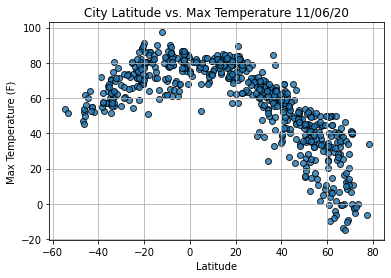

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

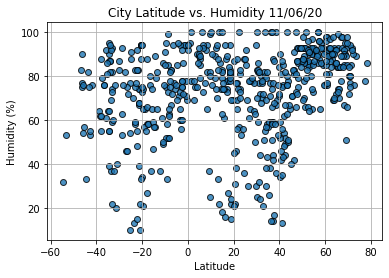

In [14]:
# 6.3.2 Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

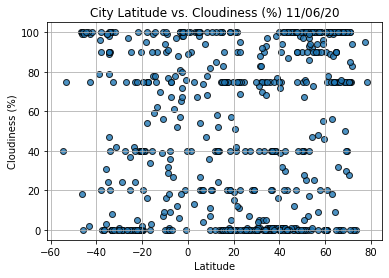

In [15]:
# 6.3.3 Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

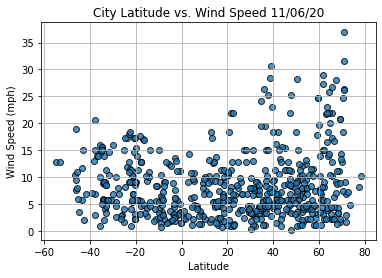

In [28]:
# 6.3.4 Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# 6.4.1 Use Linear Regression to Find the Relationship Between Variables

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [43]:
# Create a function to create perform linear regression on the 
# weather data and plot a regression line and the equation 
# with the data.

#  no output for this code until we call the function 
# with five parameters.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


northern_hemi_df.head()



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2020-11-07 00:43:08,47.67,-52.73,53.01,87,90,25.28
2,Alushta,UA,2020-11-07 00:47:55,44.67,34.42,49.64,65,100,8.55
3,Pineville,US,2020-11-07 00:44:47,31.32,-92.43,64.40,72,1,3.36
4,Kahului,US,2020-11-07 00:47:55,20.89,-156.47,89.60,46,40,18.34
6,Dikson,RU,2020-11-07 00:45:06,73.51,80.55,-0.35,89,0,4.92


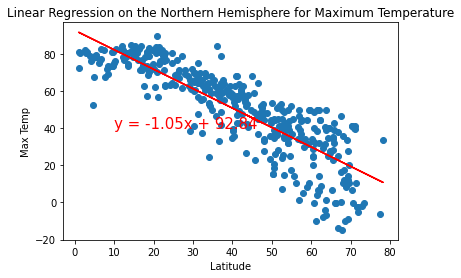

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

# Title not plotting. 

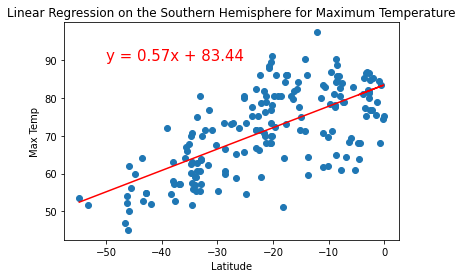

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

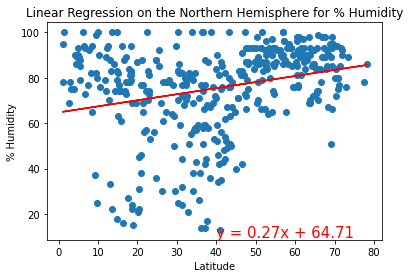

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

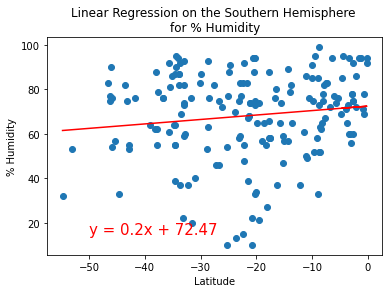

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

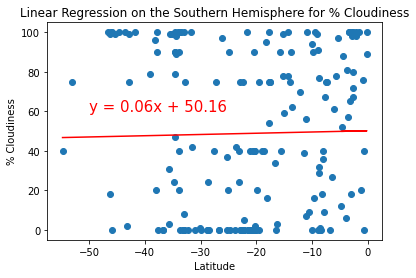

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

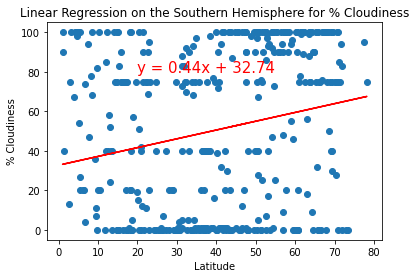

In [53]:
# Linear regression on the Southern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(20,80))
                                                                                                                        

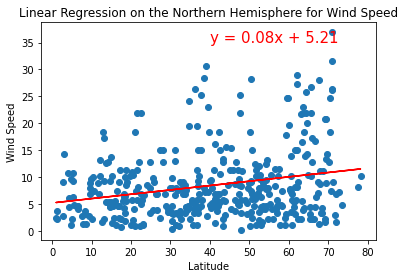

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

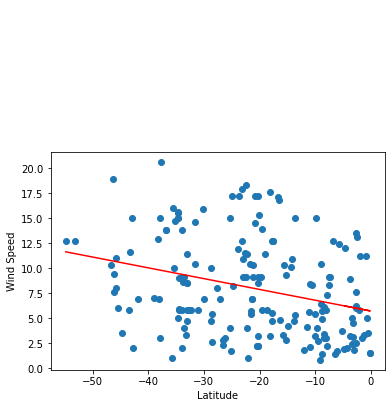

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))